<a href="https://colab.research.google.com/github/choijihye295/capstone_24/blob/main/iksan_18_no_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 익산 2018년 데이터 불러오기
file_path = '/content/drive/MyDrive/cap_data/iksan/( 2018-01-01 ~ 2018-12-31 ) 정1구역.csv'
data = pd.read_csv(file_path, encoding='euc-kr')
print(data.head())

               저장시간  내부온도  내부온도1  내부온도2  내부온도3  내부습도  내부습도1  내부습도2  내부습도3  지온  \
0  2018-01-01 00:00  14.1   13.4   14.9   40.0  85.8   83.1   88.5   99.9   0   
1  2018-01-01 00:01  14.2   13.4   14.9   40.0  85.9   83.1   88.8   99.4   0   
2  2018-01-01 00:02  14.1   13.4   14.9   40.2  86.1   83.1   89.0  100.0   0   
3  2018-01-01 00:03  14.1   13.4   14.8   40.2  85.9   83.1   88.8   99.6   0   
4  2018-01-01 00:04  14.1   13.4   14.8   40.1  86.3   83.1   89.5   99.9   0   

   ...  공급온도2  정전신호  로그인상태  회수온도1  회수온도2 EC1  EC2  PH1  PH2  내부일사  
0  ...      0    정상    로그온      0      0   0  1.5    0  0.0     0  
1  ...      0    정상    로그온      0      0   0  1.5    0  0.0     0  
2  ...      0    정상    로그온      0      0   0  1.5    0  0.0     0  
3  ...      0    정상    로그온      0      0   0  1.5    0  0.0     0  
4  ...      0    정상    로그온      0      0   0  1.5    0  0.0     0  

[5 rows x 84 columns]


In [ ]:

# 2. 결측치 확인
missing_values = data.isnull().sum()
print("결측치가 있는 열과 그 수:\n", missing_values[missing_values > 0])

결측치가 있는 열과 그 수:
 Series([], dtype: int64)


In [ ]:
# 최종 선택된 주요 변수 (수정된 열 이름 반영)
selected_columns = [
    '저장시간',         # 시간 정보
    '외부온도',         # 외부 온도
    '내부온도',         # 내부 온도 (대표 값)
    '내부온도1',        # 내부 온도1
    '내부온도2',        # 내부 온도2
    '내부온도3',        # 내부 온도3
    '내부습도',         # 내부 습도 (대표 값)
    '내부습도1',        # 내부 습도1
    '내부습도2',        # 내부 습도2
    '내부습도3',        # 내부 습도3
    '제어난방온도',     # 설정 난방 온도
    '난방온도',         # 최종 난방 온도 (타깃 변수)
    '환기조절',         # 환기조절 영향값
    '난방조절',         # 난방조절 영향값
    '내부일사',         # 광량 정보
    '일사량',          # 일사량
    'CO2농도',         # 이산화탄소 농도
    '이슬점',          # 이슬점 (온도에 추가적 영향 가능)
    '제어환기온도'      # 제어 환기 온도
]

# 선택한 변수로 데이터 필터링
data_filtered = data[selected_columns]


In [ ]:

# 4. '저장시간' 열을 datetime 형식으로 변환
data_filtered['저장시간'] = pd.to_datetime(data_filtered['저장시간'], format='%Y-%m-%d %H:%M')

# 5. 결과 확인
print(data_filtered.head())

                 저장시간  외부온도  내부온도  내부온도1  내부온도2  내부온도3  내부습도  내부습도1  내부습도2  \
0 2018-01-01 00:00:00  -2.4  14.1   13.4   14.9   40.0  85.8   83.1   88.5   
1 2018-01-01 00:01:00  -2.4  14.2   13.4   14.9   40.0  85.9   83.1   88.8   
2 2018-01-01 00:02:00  -2.5  14.1   13.4   14.9   40.2  86.1   83.1   89.0   
3 2018-01-01 00:03:00  -2.5  14.1   13.4   14.8   40.2  85.9   83.1   88.8   
4 2018-01-01 00:04:00  -2.4  14.1   13.4   14.8   40.1  86.3   83.1   89.5   

   내부습도3  제어난방온도  난방온도  환기조절  난방조절  내부일사  일사량  CO2농도   이슬점  제어환기온도  
0   99.9    14.0  14.0   0.0   0.0     0    0    424  10.5    15.0  
1   99.4    14.0  14.0   0.0   0.0     0    0    424  10.5    15.0  
2  100.0    14.0  14.0   0.0   0.0     0    0    424  10.5    15.0  
3   99.6    14.0  14.0   0.0   0.0     0    0    426  10.5    15.0  
4   99.9    14.0  14.0   0.0   0.0     0    0    424  10.5    15.0  


<ipython-input-7-348968b6b3d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['저장시간'] = pd.to_datetime(data_filtered['저장시간'], format='%Y-%m-%d %H:%M')


In [ ]:
# 전체 열을 표시할 수 있도록 설정
pd.set_option('display.max_columns', None)

# 데이터프레임 미리보기
print(data_filtered.head())


                 저장시간  외부온도  내부온도  내부온도1  내부온도2  내부온도3  내부습도  내부습도1  내부습도2  \
0 2018-01-01 00:00:00  -2.4  14.1   13.4   14.9   40.0  85.8   83.1   88.5   
1 2018-01-01 00:01:00  -2.4  14.2   13.4   14.9   40.0  85.9   83.1   88.8   
2 2018-01-01 00:02:00  -2.5  14.1   13.4   14.9   40.2  86.1   83.1   89.0   
3 2018-01-01 00:03:00  -2.5  14.1   13.4   14.8   40.2  85.9   83.1   88.8   
4 2018-01-01 00:04:00  -2.4  14.1   13.4   14.8   40.1  86.3   83.1   89.5   

   내부습도3  제어난방온도  난방온도  환기조절  난방조절  내부일사  일사량  CO2농도   이슬점  제어환기온도  
0   99.9    14.0  14.0   0.0   0.0     0    0    424  10.5    15.0  
1   99.4    14.0  14.0   0.0   0.0     0    0    424  10.5    15.0  
2  100.0    14.0  14.0   0.0   0.0     0    0    424  10.5    15.0  
3   99.6    14.0  14.0   0.0   0.0     0    0    426  10.5    15.0  
4   99.9    14.0  14.0   0.0   0.0     0    0    424  10.5    15.0  


In [ ]:
data_filtered.head()

,저장시간,외부온도,내부온도,내부온도1,내부온도2,내부온도3,내부습도,내부습도1,내부습도2,내부습도3,제어난방온도,난방온도,환기조절,난방조절,내부일사,일사량,CO2농도,이슬점,제어환기온도
0,2018-01-01 00:00:00,-2.4,14.1,13.4,14.9,40.0,85.8,83.1,88.5,99.9,14.0,14.0,0.0,0.0,0,0,424,10.5,15.0
1,2018-01-01 00:01:00,-2.4,14.2,13.4,14.9,40.0,85.9,83.1,88.8,99.4,14.0,14.0,0.0,0.0,0,0,424,10.5,15.0
2,2018-01-01 00:02:00,-2.5,14.1,13.4,14.9,40.2,86.1,83.1,89.0,100.0,14.0,14.0,0.0,0.0,0,0,424,10.5,15.0
3,2018-01-01 00:03:00,-2.5,14.1,13.4,14.8,40.2,85.9,83.1,88.8,99.6,14.0,14.0,0.0,0.0,0,0,426,10.5,15.0
4,2018-01-01 00:04:00,-2.4,14.1,13.4,14.8,40.1,86.3,83.1,89.5,99.9,14.0,14.0,0.0,0.0,0,0,424,10.5,15.0


In [ ]:
# 이상치 제거 함수 정의
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # IQR 범위 밖의 값을 NaN으로 대체 (이후 결측치 처리 가능)
        df[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound))
    return df

# 처리할 열 목록 지정 (온도와 습도 관련 열만 예시로 사용)
columns_to_process = ['외부온도', '내부온도', '내부온도1', '내부온도2', '내부온도3',
                      '내부습도', '내부습도1', '내부습도2', '내부습도3', '제어난방온도',
                      '난방온도', '환기조절', '난방조절', '내부일사', '일사량', 'CO2농도', '이슬점', '제어환기온도']

# 이상치 제거
data_no_outliers = remove_outliers(data, columns_to_process)

# 이상치 제거 후 결측치 보간
data_no_outliers = data_no_outliers.interpolate(method='linear')

# 결과 확인
print("이상치 제거 후 데이터:\n", data_no_outliers.head())


<ipython-input-10-435ee755fc7d>:22: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_no_outliers = data_no_outliers.interpolate(method='linear')


이상치 제거 후 데이터:
                저장시간  내부온도  내부온도1  내부온도2  내부온도3  내부습도  내부습도1  내부습도2  내부습도3  지온  \
0  2018-01-01 00:00  14.1   13.4   14.9   40.0  85.8   83.1   88.5   99.9   0   
1  2018-01-01 00:01  14.2   13.4   14.9   40.0  85.9   83.1   88.8   99.4   0   
2  2018-01-01 00:02  14.1   13.4   14.9   40.2  86.1   83.1   89.0  100.0   0   
3  2018-01-01 00:03  14.1   13.4   14.8   40.2  85.9   83.1   88.8   99.6   0   
4  2018-01-01 00:04  14.1   13.4   14.8   40.1  86.3   83.1   89.5   99.9   0   

   지습  공급온도1   이슬점  CO2농도  외부온도 풍향   풍속  일사량  누적일사량  감우  제어환기온도  제어난방온도  포화수분  \
0   0   40.0  10.5  424.0  -2.4  우  0.0  0.0    848   0    15.0    14.0  11.5   
1   0   40.0  10.5  424.0  -2.4  우  0.0  0.0    848   0    15.0    14.0  11.5   
2   0   40.2  10.5  424.0  -2.5  우  0.0  0.0    848   0    15.0    14.0  11.5   
3   0   40.2  10.5  426.0  -2.5  우  0.0  0.0    848   0    15.0    14.0  11.5   
4   0   40.1  10.5  424.0  -2.4  우  0.0  0.0    848   0    15.0    14.0  11.5   

   절대습도  수분

In [ ]:
import pandas as pd

# 이상치를 제거할 열 목록 지정
columns_to_process = data_filtered.select_dtypes(include=['float64', 'int64']).columns  # 숫자형 열만 선택

# 이상치 제거를 위한 함수 정의 : Q1 - 1.5 * IQR 이하 또는 Q3 + 1.5 * IQR 이상의 값을 이상치로 간주
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 1사분위수
        Q3 = df[col].quantile(0.75)  # 3사분위수
        IQR = Q3 - Q1  # IQR 계산
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # 범위 내에 있는 데이터만 필터링
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# data_filtered에 대해 이상치 제거
data_no_outliers = remove_outliers(data_filtered, columns_to_process)

# 결과 확인
print("이상치 제거 전:", data_filtered.shape)
print("이상치 제거 후:", data_no_outliers.shape)


이상치 제거 전: (525383, 19)
이상치 제거 후: (175346, 19)


In [ ]:
def remove_outliers_adjusted(df, columns, factor=3):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# IQR * 3을 적용하여 이상치 제거
data_no_outliers_adjusted = remove_outliers_adjusted(data_filtered, columns_to_process, factor=3)

# 제거 전후 크기 비교
print("완화된 이상치 제거 후 크기:", data_no_outliers_adjusted.shape)


완화된 이상치 제거 후 크기: (473179, 19)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 정규화를 위한 scaler 생성 - 완화된 이상치 제거 후 정규화
scaler = MinMaxScaler()

# 숫자형 열만 선택하여 정규화
numeric_columns = data_no_outliers_adjusted.select_dtypes(include=['float64', 'int64']).columns
data_no_outliers_adjusted[numeric_columns] = scaler.fit_transform(data_no_outliers_adjusted[numeric_columns])

# 결과 확인
print("정규화된 데이터:\n", data_no_outliers_adjusted.head())


정규화된 데이터:
                  저장시간      외부온도      내부온도     내부온도1     내부온도2     내부온도3  \
0 2018-01-01 00:00:00  0.229508  0.147059  0.151111  0.174807  0.662338   
1 2018-01-01 00:01:00  0.229508  0.149510  0.151111  0.174807  0.662338   
2 2018-01-01 00:02:00  0.227687  0.147059  0.151111  0.174807  0.667532   
3 2018-01-01 00:03:00  0.227687  0.147059  0.151111  0.172237  0.667532   
4 2018-01-01 00:04:00  0.229508  0.147059  0.151111  0.172237  0.664935   

       내부습도     내부습도1     내부습도2     내부습도3  제어난방온도  난방온도      환기조절      난방조절  \
0  0.765289  0.757184  0.820312  0.972973     0.0   0.0  0.193548  0.423077   
1  0.766942  0.757184  0.825000  0.837838     0.0   0.0  0.193548  0.423077   
2  0.770248  0.757184  0.828125  1.000000     0.0   0.0  0.193548  0.423077   
3  0.766942  0.757184  0.825000  0.891892     0.0   0.0  0.193548  0.423077   
4  0.773554  0.757184  0.835938  0.972973     0.0   0.0  0.193548  0.423077   

   내부일사  일사량     CO2농도       이슬점    제어환기온도  
0   0.0  0.0  0.51

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중공선성 확인을 위한 함수 정의
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# 숫자형 열만 선택
numeric_columns = data_no_outliers_adjusted.select_dtypes(include=['float64', 'int64']).columns
data_numeric = data_no_outliers_adjusted[numeric_columns]

# VIF 계산
vif_df = calculate_vif(data_numeric)

# 결과 출력
print(vif_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


   Feature           VIF
0     외부온도     52.433238
1     내부온도  12483.775424
2    내부온도1   5803.767738
3    내부온도2   3116.966149
4    내부온도3     13.444674
5     내부습도    132.151255
6    내부습도1    993.913406
7    내부습도2     86.206313
8    내부습도3     29.918498
9   제어난방온도   5359.564605
10    난방온도   4189.979452
11    환기조절     21.209049
12    난방조절    697.183855
13    내부일사           NaN
14     일사량      7.071224
15   CO2농도     24.073608
16     이슬점   1838.537917
17  제어환기온도      5.101542


In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 내부온도 및 내부습도 변수 결합 (평균값 사용)
data_no_outliers_adjusted['평균_내부온도'] = data_no_outliers_adjusted[['내부온도', '내부온도1', '내부온도2', '내부온도3']].mean(axis=1)
data_no_outliers_adjusted['평균_내부습도'] = data_no_outliers_adjusted[['내부습도', '내부습도1', '내부습도2', '내부습도3']].mean(axis=1)

# 결합한 후 불필요해진 원래 변수 제거
data_reduced = data_no_outliers_adjusted.drop(columns=['내부온도', '내부온도1', '내부온도2', '내부온도3',
                                                      '내부습도', '내부습도1', '내부습도2', '내부습도3'])

# 다중공선성 확인을 위한 VIF 계산 함수
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# 숫자형 열에 대해 VIF 다시 계산
numeric_columns = data_reduced.select_dtypes(include=['float64', 'int64']).columns
vif_df = calculate_vif(data_reduced[numeric_columns])

# 결과 출력
print(vif_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


    Feature          VIF
0      외부온도    34.417562
1    제어난방온도  1081.428592
2      난방온도   861.322118
3      환기조절    19.414686
4      난방조절   130.009920
5      내부일사          NaN
6       일사량     6.591468
7     CO2농도    22.843933
8       이슬점    68.832305
9    제어환기온도     5.034992
10  평균_내부온도    80.349891
11  평균_내부습도   102.103614


In [ ]:
# 외부온도와 내부온도의 차이 절대값 계산하여 새로운 파생 변수 추가
data_reduced['온도차이_절대값'] = abs(data_reduced['외부온도'] - data_reduced['평균_내부온도'])

# 주요 특징 선택
selected_features = [
    '외부온도', '평균_내부온도', '평균_내부습도', '제어환기온도', '환기조절', '난방조절',
    'CO2농도', '일사량', '이슬점', '온도차이_절대값'
]
data_final = data_reduced[selected_features]

# 결과 확인
print("선택된 주요 특징과 파생 변수:\n", data_final.head())


선택된 주요 특징과 파생 변수:
        외부온도   평균_내부온도   평균_내부습도    제어환기온도      환기조절      난방조절     CO2농도  일사량  \
0  0.229508  0.283829  0.828940  0.103448  0.193548  0.423077  0.511494  0.0   
1  0.229508  0.284441  0.796741  0.103448  0.193548  0.423077  0.511494  0.0   
2  0.227687  0.285127  0.838889  0.103448  0.193548  0.423077  0.511494  0.0   
3  0.227687  0.284485  0.810254  0.103448  0.193548  0.423077  0.517241  0.0   
4  0.229508  0.283835  0.834912  0.103448  0.193548  0.423077  0.511494  0.0   

        이슬점  온도차이_절대값  
0  0.143469  0.054321  
1  0.143469  0.054933  
2  0.143469  0.057441  
3  0.143469  0.056798  
4  0.143469  0.054327  


In [ ]:
# 입력 변수(X)와 타깃 변수(y) 설정
X = data_final.drop(columns=['평균_내부온도', '평균_내부습도'])  # 타깃 변수를 제외한 모든 주요 특징을 포함
y = data_final[['평균_내부온도', '평균_내부습도']]  # 예측할 타깃 변수


In [ ]:
from google.colab import drive
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

# 폰트 경로 설정 (Google Drive의 위치에 따라 경로 수정)
font_path = '/content/drive/MyDrive/fonts/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 폰트 설정 확인 (한글이 깨지지 않도록 설정)
print("현재 설정된 한글 폰트:", font_name)

현재 설정된 한글 폰트: NanumGothic


현재 설정된 한글 폰트: NanumGothic


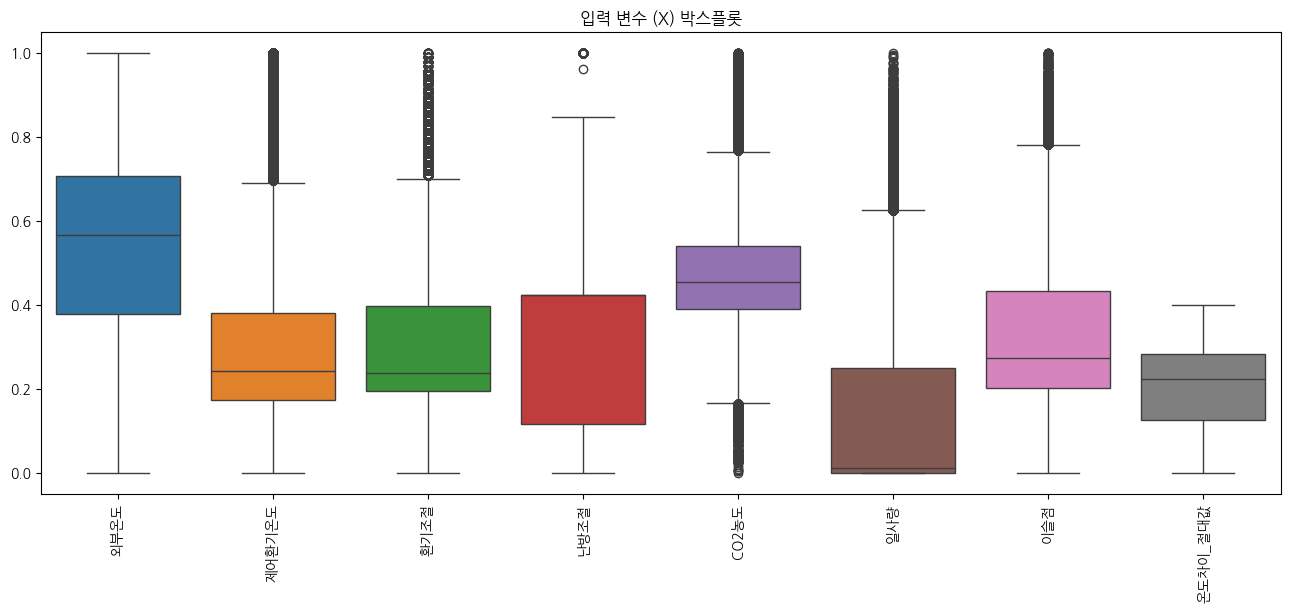

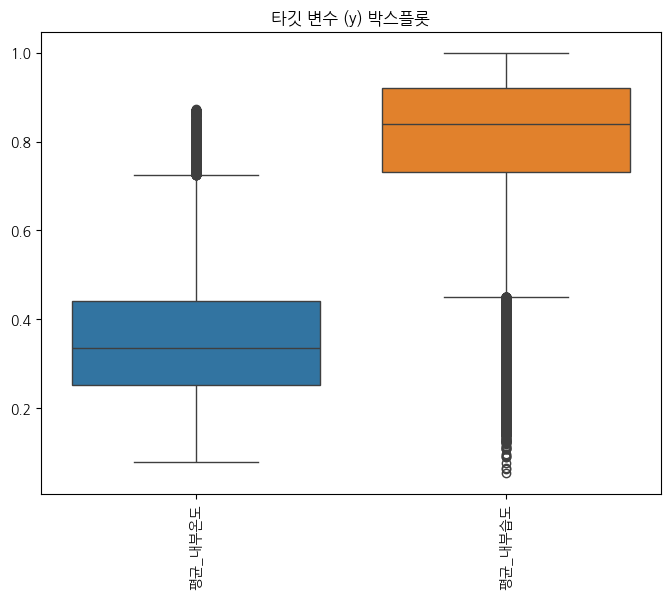

In [ ]:
from google.colab import drive
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트를 Matplotlib에 추가 및 적용
font_manager.fontManager.addfont(font_path)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 설정된 폰트 확인
print("현재 설정된 한글 폰트:", font_name)

# 데이터 예시 (X와 y 변수가 있다고 가정)
# 예시 데이터 - 입력 변수(X)와 타깃 변수(y) 박스플롯 그리기
plt.figure(figsize=(16, 6))
sns.boxplot(data=X)  # X는 입력 변수 데이터프레임
plt.xticks(rotation=90)
plt.title("입력 변수 (X) 박스플롯")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=y)  # y는 타깃 변수 데이터프레임
plt.xticks(rotation=90)
plt.title("타깃 변수 (y) 박스플롯")
plt.show()


## 결과 설명

1. 입력 변수 (X) 박스플롯
주요 입력 변수들이 다양한 범위로 분포하고 있으며, 데이터가 0과 1 사이로 정규화되어 있어서 모델 학습에 적합한 상태로 보입니다.
일부 변수에서 이상치가 존재하는데, 예를 들어, "환기조절", "난방조절", "CO2농도" 변수에서는 극단적인 값들이 여전히 남아 있습니다. 하지만 이 이상치들은 실제 환경의 특성일 수 있기 때문에, 반드시 제거할 필요는 없을 수도 있습니다.
"온도차이 절대값"은 대체로 0에 가까운 값을 가지며, 외부온도와 내부온도의 차이가 크지 않음을 나타내고 있습니다. 이는 내부 환경이 비교적 안정적으로 유지된다는 것을 의미할 수 있습니다.
2. 타깃 변수 (y) 박스플롯
"내부온도"와 "내부습도" 모두 비교적 분포가 넓은데, 이는 내부 환경 조절이 다양한 외부 조건과 영향을 받을 수 있다는 것을 암시합니다.
특히 "내부습도"의 경우 상위 구간에 많은 데이터가 밀집되어 있으며, 극단적인 이상치들이 하위 구간에 존재하고 있습니다. 이는 특정 시점에 습도가 급격히 떨어지는 경우가 발생했을 수 있음을 나타냅니다.
"내부온도"의 분포도 대체로 안정적인 것으로 보이지만, 소수의 극단적인 데이터가 상단에 위치하고 있어 극한의 온도 환경에서 데이터가 수집되었을 가능성을 시사합니다.
종합 의견
데이터는 전처리를 통해 적절히 정규화되었으며, 타깃 변수 예측에 필요한 주요 특징들을 잘 반영하고 있습니다.
이상치는 일부 남아 있지만, 실제 환경에서 수집된 데이터이기 때문에 모든 이상치를 제거하지 않고 실제 상황을 반영하는 것이 더 유리할 수 있습니다.
이 데이터로 예측 모델을 학습시킬 경우, 내부온도와 내부습도 조절을 위한 기초적인 환경 변수를 잘 반영할 것으로 보입니다.